# 🚴 주제: 서울시 자전거 공유 가능 주요 데이터 셋
- 도시에서 공유할 수 있는 자전거의 수를 예측하는 모델

In [1]:
import pandas as pd

b_df = pd.read_csv('../../datasets/p_bike.csv')
b_df

Date  Rented Bike Count  Hour  Temperature(?C)  Humidity(%)  \
0      1/12/2017                254     0             -5.2           37   
1      1/12/2017                204     1             -5.5           38   
2      1/12/2017                173     2             -6.0           39   
3      1/12/2017                107     3             -6.2           40   
4      1/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature  \
0                  2.2              2000                  -17.6   
1                  0.8              2000                  -17.6   
2                  1.0              2000                  -17.7   
3                  0.9              2000                  -17.6   
4                  2.3              2000                  -18.6   
...                ...               ...                    ...   
8755               2.6              1894                  -10.3   
8756               2.3              2000                   -9.9   
8757               0.3              1968                   -9.9   
8758               1.0              1859                   -9.8   
8759               1.3              1909                   -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [2]:
# 범주형 데이터를 제외한 데이터 프레임 생성
origin_b_df = b_df.copy()
pre_b_df = b_df.copy()
pre_b_df = pre_b_df.drop(labels = ['Date', 'Seasons','Holiday','Functioning Day'], axis=1)

In [3]:
# 타겟 컬럼 위치 변경
target_column =  pre_b_df.pop('Rented Bike Count')
pre_b_df.loc[:, 'target'] = target_column
pre_b_df

Hour  Temperature(?C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0        0             -5.2           37               2.2              2000   
1        1             -5.5           38               0.8              2000   
2        2             -6.0           39               1.0              2000   
3        3             -6.2           40               0.9              2000   
4        4             -6.0           36               2.3              2000   
...    ...              ...          ...               ...               ...   
8755    19              4.2           34               2.6              1894   
8756    20              3.4           37               2.3              2000   
8757    21              2.6           39               0.3              1968   
8758    22              2.1           41               1.0              1859   
8759    23              1.9           43               1.3              1909   

      Dew point temperature  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                     -17.6                      0.0           0.0   
1                     -17.6                      0.0           0.0   
2                     -17.7                      0.0           0.0   
3                     -17.6                      0.0           0.0   
4                     -18.6                      0.0           0.0   
...                     ...                      ...           ...   
8755                  -10.3                      0.0           0.0   
8756                   -9.9                      0.0           0.0   
8757                   -9.9                      0.0           0.0   
8758                   -9.8                      0.0           0.0   
8759                   -9.3                      0.0           0.0   

      Snowfall (cm)  target  
0               0.0     254  
1               0.0     204  
2               0.0     173  
3               0.0     107  
4               0.0      78  
...             ...     ...  
8755            0.0    1003  
8756            0.0     764  
8757            0.0     694  
8758            0.0     712  
8759            0.0     584  

[8760 rows x 10 columns]

In [4]:
pre_b_df.isna().sum()

Hour                       0
Temperature(?C)            0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Dew point temperature      0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
target                     0
dtype: int64

In [5]:
pre_b_df.duplicated().sum()

0

In [6]:
# 상관관계 확인
pre_b_df.corr()['target'].sort_values(ascending=False)[1:]

Temperature(?C)            0.538558
Hour                       0.410257
Dew point temperature      0.379788
Solar Radiation (MJ/m2)    0.261837
Visibility (10m)           0.199280
Wind speed (m/s)           0.121108
Rainfall(mm)              -0.123074
Snowfall (cm)             -0.141804
Humidity(%)               -0.199780
Name: target, dtype: float64

<Axes: >

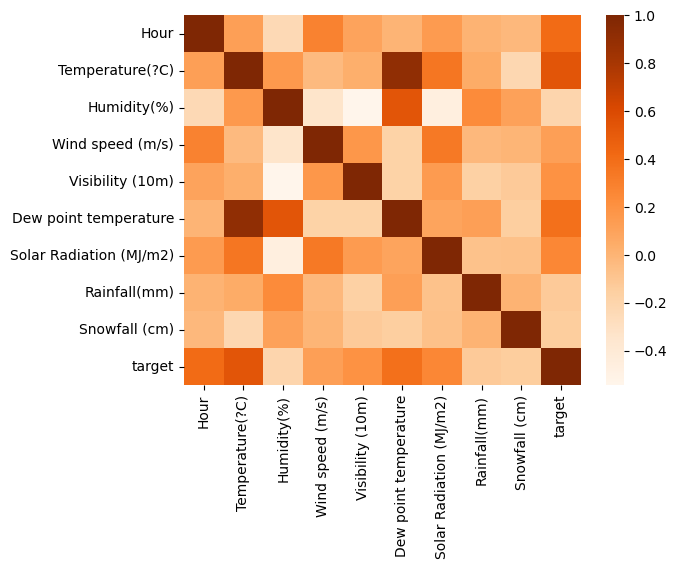

In [7]:
import seaborn as sns
corr = pre_b_df.corr()
sns.heatmap(corr, cmap='Oranges')

In [8]:
# OLS 수치 확인
from statsmodels.api import OLS


features, targets = pre_b_df.iloc[:, :-1], pre_b_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.758
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              3042.
Date:                Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                        16:50:15   Log-Likelihood:                         -66330.
No. Observations:                8760   AIC:                                  1.327e+05
Df Residuals:                    8751   BIC:                                  1.327e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

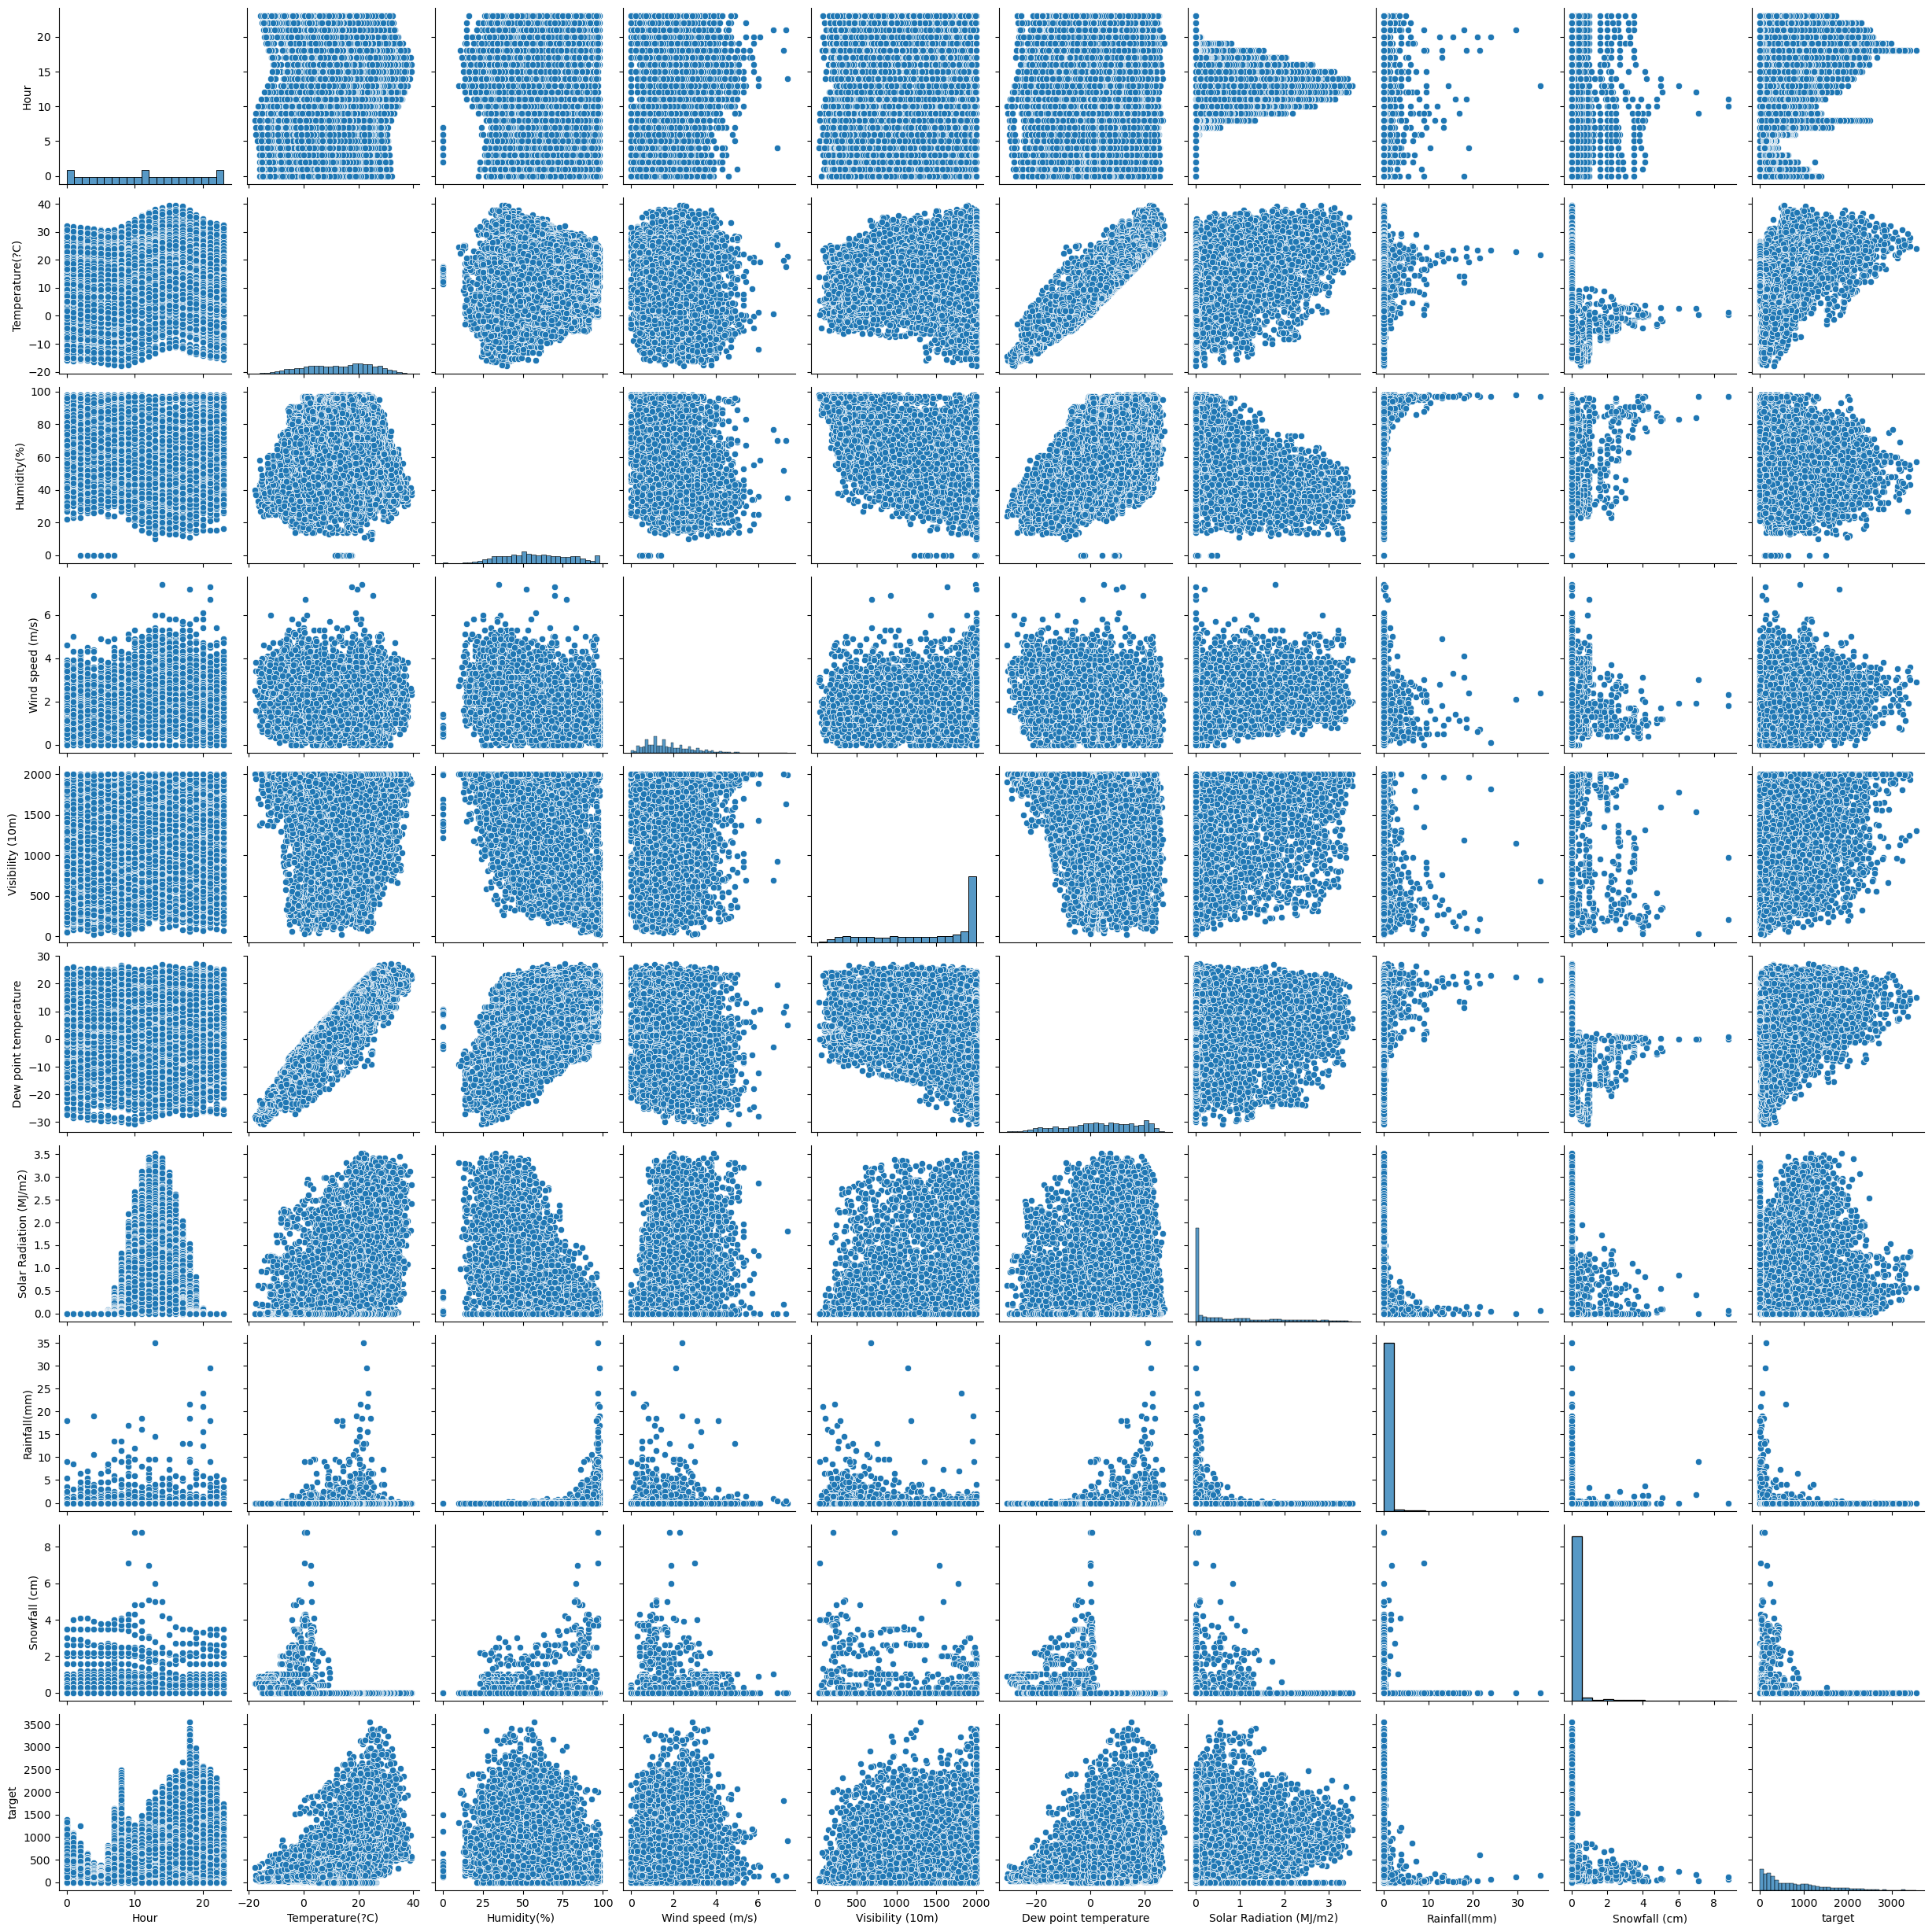

In [9]:
import seaborn as sns 

sns.pairplot(pre_b_df)

# Cycle01
- 타겟형 데이터를 제외한 모델 훈련 진행, r2 score 확인

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_b_df.iloc[:, :-1], pre_b_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)


LinearRegression()

In [11]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))


In [12]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation_negative(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    # MSLE = mean_squared_log_error(y_test, prediction)
    # RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    # print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, MSLE, RMSLE, R2))
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))


In [13]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 208294.7827, RMSE: 456.3932, R2: 0.4893


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=3).fit_transform(features)

X_train, X_test, y_train, y_test =\
train_test_split(poly_features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [15]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 140395.6319, RMSE: 374.6941, R2: 0.6558


MSE: 128546.7844, RMSE: 358.5342, R2: 0.6928
MSE: 132403.7434, RMSE: 363.8733, R2: 0.6823


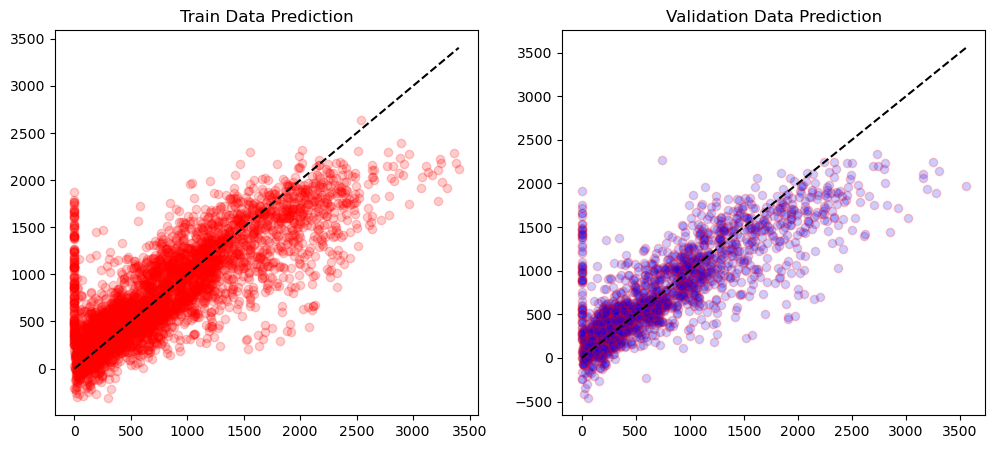

In [16]:
import matplotlib.pyplot as plt


r_X_train, v_X_train, r_y_train, v_y_train = \
train_test_split(X_train, y_train, test_size= 0.3, random_state=321)

r_X_train_prediction = l_r.predict(r_X_train)
get_evaluation_negative(r_y_train, r_X_train_prediction)

v_X_train_prediction = l_r.predict(v_X_train)
get_evaluation_negative(v_y_train, v_X_train_prediction)


fig, ax = plt.subplots(1, 2, figsize= (12, 5))

ax[0].scatter(r_y_train, r_X_train_prediction, edgecolors='red', c='red', alpha=0.2)
ax[0].plot([r_y_train.min(), r_y_train.max()], [r_y_train.min(), r_y_train.max()], 'k--')
ax[0].set_title('Train Data Prediction')

ax[1].scatter(v_y_train, v_X_train_prediction, edgecolors='red', c='blue', alpha=0.2)
ax[1].plot([v_y_train.min(), v_y_train.max()], [v_y_train.min(), v_y_train.max()], 'k--')
ax[1].set_title('Validation Data Prediction')
plt.show()



MSE: 140395.6319, RMSE: 374.6941, R2: 0.6558


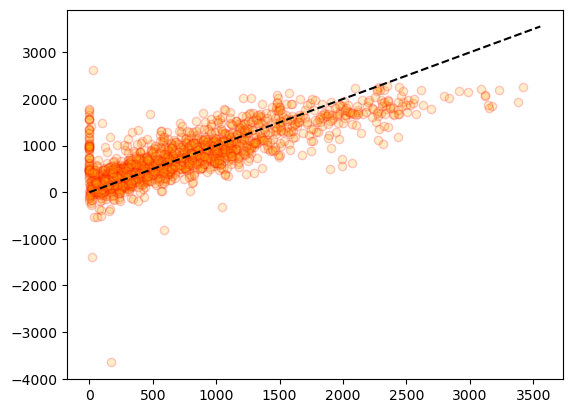

In [17]:
import matplotlib.pyplot as plt

prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

# C01
- 비선형훈련에서 더 높은 점수를 보이고 있기 때문에 비선형 데이터 확인.
- val data 와 train 데이터에서 큰 차이는 보이지 않기 때문에 별도의 과적합인지 판단 불가
- 이상치가 존재하는 것으로 확인

# Cycle02
- 기존 범주형 데이터를 추가한 후 훈련 진행

In [18]:
origin_b_df = origin_b_df.drop(labels = ['Date','Functioning Day'], axis=1)

In [19]:
# 타겟 컬럼 위치 변경
target_column =  origin_b_df.pop('Rented Bike Count')
origin_b_df.loc[:, 'target'] = target_column
origin_b_df

Hour  Temperature(?C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0        0             -5.2           37               2.2              2000   
1        1             -5.5           38               0.8              2000   
2        2             -6.0           39               1.0              2000   
3        3             -6.2           40               0.9              2000   
4        4             -6.0           36               2.3              2000   
...    ...              ...          ...               ...               ...   
8755    19              4.2           34               2.6              1894   
8756    20              3.4           37               2.3              2000   
8757    21              2.6           39               0.3              1968   
8758    22              2.1           41               1.0              1859   
8759    23              1.9           43               1.3              1909   

      Dew point temperature  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                     -17.6                      0.0           0.0   
1                     -17.6                      0.0           0.0   
2                     -17.7                      0.0           0.0   
3                     -17.6                      0.0           0.0   
4                     -18.6                      0.0           0.0   
...                     ...                      ...           ...   
8755                  -10.3                      0.0           0.0   
8756                   -9.9                      0.0           0.0   
8757                   -9.9                      0.0           0.0   
8758                   -9.8                      0.0           0.0   
8759                   -9.3                      0.0           0.0   

      Snowfall (cm) Seasons     Holiday  target  
0               0.0  Winter  No Holiday     254  
1               0.0  Winter  No Holiday     204  
2               0.0  Winter  No Holiday     173  
3               0.0  Winter  No Holiday     107  
4               0.0  Winter  No Holiday      78  
...             ...     ...         ...     ...  
8755            0.0  Autumn  No Holiday    1003  
8756            0.0  Autumn  No Holiday     764  
8757            0.0  Autumn  No Holiday     694  
8758            0.0  Autumn  No Holiday     712  
8759            0.0  Autumn  No Holiday     584  

[8760 rows x 12 columns]

In [20]:
# 범주형 데이터 레이블인코딩
from sklearn.preprocessing import LabelEncoder

columns = ['Seasons', 'Holiday']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(origin_b_df[column])
    origin_b_df[column] = result
    label_encoders[column] = encoder.classes_

label_encoders

{'Seasons': array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object),
 'Holiday': array(['Holiday', 'No Holiday'], dtype=object)}

In [21]:
# 상관관계 확인
origin_b_df.corr()['target'].sort_values(ascending=False)[1:]

Temperature(?C)            0.538558
Hour                       0.410257
Dew point temperature      0.379788
Solar Radiation (MJ/m2)    0.261837
Visibility (10m)           0.199280
Wind speed (m/s)           0.121108
Holiday                    0.072338
Rainfall(mm)              -0.123074
Snowfall (cm)             -0.141804
Humidity(%)               -0.199780
Seasons                   -0.253058
Name: target, dtype: float64

In [22]:
# OLS 수치 확인
from statsmodels.api import OLS

features, targets = origin_b_df.iloc[:, :-1], origin_b_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                              2574.
Date:                Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                        16:50:23   Log-Likelihood:                         -66217.
No. Observations:                8760   AIC:                                  1.325e+05
Df Residuals:                    8749   BIC:                                  1.325e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = origin_b_df.iloc[:, :-1], origin_b_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [24]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 203459.3725, RMSE: 451.0647, R2: 0.5012


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test =\
train_test_split(poly_features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [26]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 162936.3859, RMSE: 403.6538, R2: 0.6005


In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = origin_b_df.iloc[:, :-1], origin_b_df.iloc[:, -1]

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

dt_r = DecisionTreeRegressor(random_state=321)
rd_r = RandomForestRegressor(random_state=321)
gb_r = GradientBoostingRegressor(random_state=321)
xgb_r = XGBRegressor(random_state=321)
lgb_r = LGBMRegressor(random_state=321)

models = [dt_r, rd_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation_negative(y_test, prediction)

DecisionTreeRegressor
MSE: 180518.2426, RMSE: 424.8744, R2: 0.5574
RandomForestRegressor
MSE: 85586.0729, RMSE: 292.5510, R2: 0.7902
GradientBoostingRegressor
MSE: 91201.5446, RMSE: 301.9959, R2: 0.7764
XGBRegressor
MSE: 86721.8676, RMSE: 294.4858, R2: 0.7874
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1250
[LightGBM] [Info] Number of data points in the train set: 7008, number of used features: 11
[LightGBM] [Info] Start training from score 707.558647
LGBMRegressor
MSE: 81825.2797, RMSE: 286.0512, R2: 0.7994


# C02
- 범주형 데이터 추가 시 비선형 데이터 수치가 높아지는 부분 확인
- 트리기반의 모델에서 훈련이 더 잘되는 것을 확인하여 트리기반의 모델 선택

# Cycle 03
- 이상치를 확인하였기 때문에 이상치 제거 후 훈련 진행

In [28]:
# 이상치 제거를 위한 표준화 작업
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(origin_b_df)
std_origin_b_df = pd.DataFrame(result, columns = origin_b_df.columns)
std_origin_b_df


Hour  Temperature(?C)  Humidity(%)  Wind speed (m/s)  \
0    -1.661325        -1.513957    -1.042483          0.458476   
1    -1.516862        -1.539074    -0.993370         -0.892561   
2    -1.372399        -1.580936    -0.944257         -0.699556   
3    -1.227936        -1.597680    -0.895144         -0.796059   
4    -1.083473        -1.580936    -1.091596          0.554978   
...        ...              ...          ...               ...   
8755  1.083473        -0.726961    -1.189822          0.844486   
8756  1.227936        -0.793939    -1.042483          0.554978   
8757  1.372399        -0.860918    -0.944257         -1.375075   
8758  1.516862        -0.902779    -0.846031         -0.699556   
8759  1.661325        -0.919524    -0.747806         -0.410048   

      Visibility (10m)  Dew point temperature  Solar Radiation (MJ/m2)  \
0             0.925871              -1.659605                -0.655132   
1             0.925871              -1.659605                -0.655132   
2             0.925871              -1.667262                -0.655132   
3             0.925871              -1.659605                -0.655132   
4             0.925871              -1.736177                -0.655132   
...                ...                    ...                      ...   
8755          0.751605              -1.100630                -0.655132   
8756          0.925871              -1.070001                -0.655132   
8757          0.873263              -1.070001                -0.655132   
8758          0.694064              -1.062344                -0.655132   
8759          0.776265              -1.024058                -0.655132   

      Rainfall(mm)  Snowfall (cm)   Seasons   Holiday    target  
0          -0.1318      -0.171891  1.349771  0.227757 -0.698650  
1          -0.1318      -0.171891  1.349771  0.227757 -0.776175  
2          -0.1318      -0.171891  1.349771  0.227757 -0.824240  
3          -0.1318      -0.171891  1.349771  0.227757 -0.926571  
4          -0.1318      -0.171891  1.349771  0.227757 -0.971535  
...            ...            ...       ...       ...       ...  
8755       -0.1318      -0.171891 -1.342395  0.227757  0.462661  
8756       -0.1318      -0.171891 -1.342395  0.227757  0.092095  
8757       -0.1318      -0.171891 -1.342395  0.227757 -0.016438  
8758       -0.1318      -0.171891 -1.342395  0.227757  0.011470  
8759       -0.1318      -0.171891 -1.342395  0.227757 -0.186991  

[8760 rows x 12 columns]

In [29]:
# 이상치 확인 및 제거
condition = True
error_count = []

for column in std_origin_b_df.columns:
    if std_origin_b_df[column].between(-1.96, 1.96) is True:
        error_count.append(std_origin_b_df[column].between(-1.96, 1.96).count())
    condition &= std_origin_b_df[column].between(-1.96, 1.96)

std_origin_b_df = std_origin_b_df[condition]
std_origin_b_df


Hour  Temperature(?C)  Humidity(%)  Wind speed (m/s)  \
0    -1.661325        -1.513957    -1.042483          0.458476   
1    -1.516862        -1.539074    -0.993370         -0.892561   
2    -1.372399        -1.580936    -0.944257         -0.699556   
3    -1.227936        -1.597680    -0.895144         -0.796059   
4    -1.083473        -1.580936    -1.091596          0.554978   
...        ...              ...          ...               ...   
8755  1.083473        -0.726961    -1.189822          0.844486   
8756  1.227936        -0.793939    -1.042483          0.554978   
8757  1.372399        -0.860918    -0.944257         -1.375075   
8758  1.516862        -0.902779    -0.846031         -0.699556   
8759  1.661325        -0.919524    -0.747806         -0.410048   

      Visibility (10m)  Dew point temperature  Solar Radiation (MJ/m2)  \
0             0.925871              -1.659605                -0.655132   
1             0.925871              -1.659605                -0.655132   
2             0.925871              -1.667262                -0.655132   
3             0.925871              -1.659605                -0.655132   
4             0.925871              -1.736177                -0.655132   
...                ...                    ...                      ...   
8755          0.751605              -1.100630                -0.655132   
8756          0.925871              -1.070001                -0.655132   
8757          0.873263              -1.070001                -0.655132   
8758          0.694064              -1.062344                -0.655132   
8759          0.776265              -1.024058                -0.655132   

      Rainfall(mm)  Snowfall (cm)   Seasons   Holiday    target  
0          -0.1318      -0.171891  1.349771  0.227757 -0.698650  
1          -0.1318      -0.171891  1.349771  0.227757 -0.776175  
2          -0.1318      -0.171891  1.349771  0.227757 -0.824240  
3          -0.1318      -0.171891  1.349771  0.227757 -0.926571  
4          -0.1318      -0.171891  1.349771  0.227757 -0.971535  
...            ...            ...       ...       ...       ...  
8755       -0.1318      -0.171891 -1.342395  0.227757  0.462661  
8756       -0.1318      -0.171891 -1.342395  0.227757  0.092095  
8757       -0.1318      -0.171891 -1.342395  0.227757 -0.016438  
8758       -0.1318      -0.171891 -1.342395  0.227757  0.011470  
8759       -0.1318      -0.171891 -1.342395  0.227757 -0.186991  

[6003 rows x 12 columns]

In [30]:
# 이상치 제거한 데이터를 인덱스 번호에 맞게 가져오기
origin_b_df = origin_b_df.iloc[std_origin_b_df.index].reset_index(drop=True)
origin_b_df

Hour  Temperature(?C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0        0             -5.2           37               2.2              2000   
1        1             -5.5           38               0.8              2000   
2        2             -6.0           39               1.0              2000   
3        3             -6.2           40               0.9              2000   
4        4             -6.0           36               2.3              2000   
...    ...              ...          ...               ...               ...   
5998    19              4.2           34               2.6              1894   
5999    20              3.4           37               2.3              2000   
6000    21              2.6           39               0.3              1968   
6001    22              2.1           41               1.0              1859   
6002    23              1.9           43               1.3              1909   

      Dew point temperature  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                     -17.6                      0.0           0.0   
1                     -17.6                      0.0           0.0   
2                     -17.7                      0.0           0.0   
3                     -17.6                      0.0           0.0   
4                     -18.6                      0.0           0.0   
...                     ...                      ...           ...   
5998                  -10.3                      0.0           0.0   
5999                   -9.9                      0.0           0.0   
6000                   -9.9                      0.0           0.0   
6001                   -9.8                      0.0           0.0   
6002                   -9.3                      0.0           0.0   

      Snowfall (cm)  Seasons  Holiday  target  
0               0.0        3        1     254  
1               0.0        3        1     204  
2               0.0        3        1     173  
3               0.0        3        1     107  
4               0.0        3        1      78  
...             ...      ...      ...     ...  
5998            0.0        0        1    1003  
5999            0.0        0        1     764  
6000            0.0        0        1     694  
6001            0.0        0        1     712  
6002            0.0        0        1     584  

[6003 rows x 12 columns]

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = origin_b_df.iloc[:, :-1], origin_b_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [32]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 141044.1497, RMSE: 375.5585, R2: 0.4673


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test =\
train_test_split(poly_features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [34]:
prediction = l_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 125052.8676, RMSE: 353.6281, R2: 0.5277


In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = origin_b_df.iloc[:, :-1], origin_b_df.iloc[:, -1]

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

dt_r = DecisionTreeRegressor(random_state=321)
rd_r = RandomForestRegressor(random_state=321)
gb_r = GradientBoostingRegressor(random_state=321)
xgb_r = XGBRegressor(random_state=321)
lgb_r = LGBMRegressor(random_state=321)

models = [dt_r, rd_r, gb_r, xgb_r, lgb_r]

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation_negative(y_test, prediction)

DecisionTreeRegressor
MSE: 124514.8276, RMSE: 352.8666, R2: 0.5297
RandomForestRegressor
MSE: 75376.0106, RMSE: 274.5469, R2: 0.7153
GradientBoostingRegressor
MSE: 83471.2015, RMSE: 288.9138, R2: 0.6847
XGBRegressor
MSE: 81891.1387, RMSE: 286.1663, R2: 0.6907
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1147
[LightGBM] [Info] Number of data points in the train set: 4802, number of used features: 10
[LightGBM] [Info] Start training from score 625.310912
LGBMRegressor
MSE: 76253.2006, RMSE: 276.1398, R2: 0.7120


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1128
[LightGBM] [Info] Number of data points in the train set: 3361, number of used features: 10
[LightGBM] [Info] Start training from score 623.354954
MSE: 27777.2477, RMSE: 166.6651, R2: 0.8938
MSE: 70975.4462, RMSE: 266.4122, R2: 0.7279


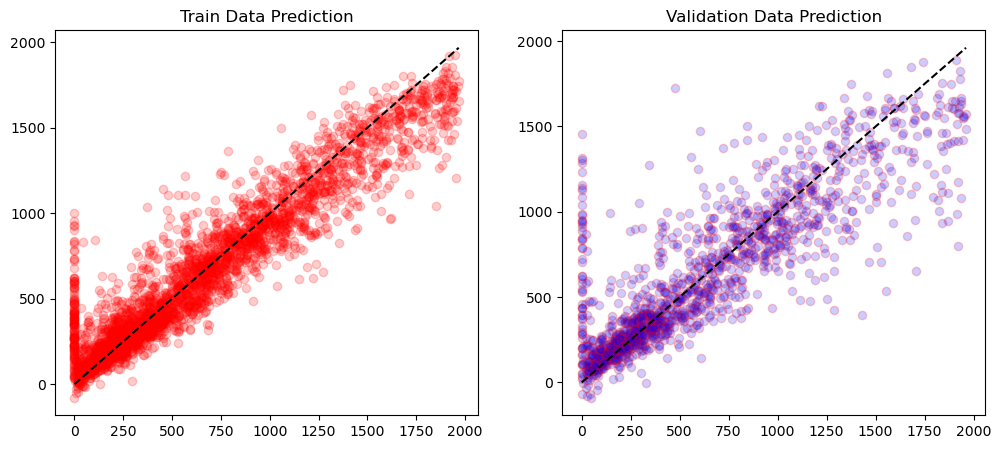

In [36]:
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

r_X_train, v_X_train, r_y_train, v_y_train = \
train_test_split(X_train, y_train, test_size= 0.3, random_state=321)
# 모델 학습 및 예측
lgb_r.fit(r_X_train, r_y_train)
prediction_r_train = lgb_r.predict(r_X_train)
prediction_v_train = lgb_r.predict(v_X_train)

# 평가
get_evaluation_negative(r_y_train, prediction_r_train)
get_evaluation_negative(v_y_train, prediction_v_train)

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(r_y_train, prediction_r_train, edgecolors='red', c='red', alpha=0.2)
ax[0].plot([r_y_train.min(), r_y_train.max()], [r_y_train.min(), r_y_train.max()], 'k--')
ax[0].set_title('Train Data Prediction')

ax[1].scatter(v_y_train, prediction_v_train, edgecolors='red', c='blue', alpha=0.2)
ax[1].plot([v_y_train.min(), v_y_train.max()], [v_y_train.min(), v_y_train.max()], 'k--')
ax[1].set_title('Validation Data Prediction')
plt.show()

MSE: 76110.9140, RMSE: 275.8821, R2: 0.7125


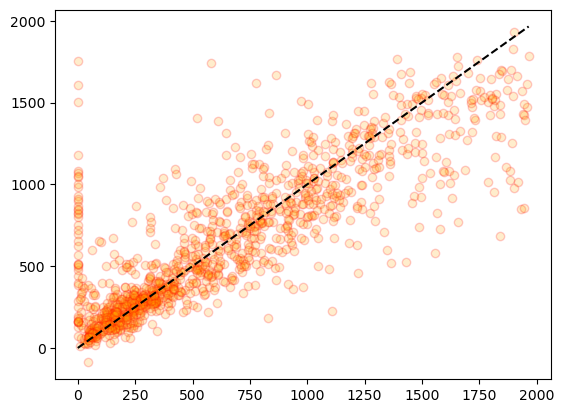

In [37]:
import matplotlib.pyplot as plt

prediction = lgb_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

# C03 
- 이상치를 제거하였음에도 트리모델에서 더 높은 시뢰성을 확인할 수 있음
- 검증데이터와 훈련데이터 분리 시 점수 차이가 있으며 과적합이 있을 수 있다는 판단

# Cycle04 
- 과적합의 정도를 판단하기 위해 교차검증을 진행
- 데이터의 예측 정도를 봤을 때 과적합이 있을 수 있다는 판단

In [38]:
from sklearn.model_selection import cross_val_score, KFold

features, targets = origin_b_df.iloc[:,:-1], origin_b_df.iloc[:,-1]

kf = KFold(n_splits=10, random_state=124, shuffle=True)
scores = cross_val_score(lgb_r, features, targets , cv=kf)
scores

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1146
[LightGBM] [Info] Number of data points in the train set: 5402, number of used features: 10
[LightGBM] [Info] Start training from score 629.602740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1152
[LightGBM] [Info] Number of data points in the train set: 5402, number of used features: 10
[LightGBM] [Info] Start training from score 630.156424
[LightGBM] [Warning] Found

array([0.71814081, 0.69445638, 0.76220015, 0.76456613, 0.72783646,
       0.73668311, 0.74809151, 0.74124126, 0.70939338, 0.7747291 ])

In [39]:
# 교차검증 및 l2 규제
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline


features, targets = origin_b_df.iloc[:,:-1], origin_b_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, test_size=0.2, random_state=321)

kfold = KFold(n_splits=10, random_state=124, shuffle=True)

lgb_r = LGBMRegressor()

parameters = {
    'random_state': [321],
    # 'min_gain_to_split' : [0.01], 
    # 'max_depth' : [10],
    # 'num_leaves' : [31],
    # 'reg_lambda': [100],
    'verbose': [-1]
}

g_lgb_r = GridSearchCV(lgb_r, param_grid=parameters, cv=kfold, scoring='neg_mean_squared_error')
g_lgb_r.fit(X_train, y_train)

# 최적의 파라미터와 성능 출력
print("Best parameters:", g_lgb_r.best_params_)
print("Best cross-validation score: {:.3f}".format(-g_lgb_r.best_score_))


Best parameters: {'random_state': 321, 'verbose': -1}
Best cross-validation score: 69841.812


In [40]:
prediction = g_lgb_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 76253.2006, RMSE: 276.1398, R2: 0.7120


MSE: 27777.2477, RMSE: 166.6651, R2: 0.8938
MSE: 70975.4462, RMSE: 266.4122, R2: 0.7279


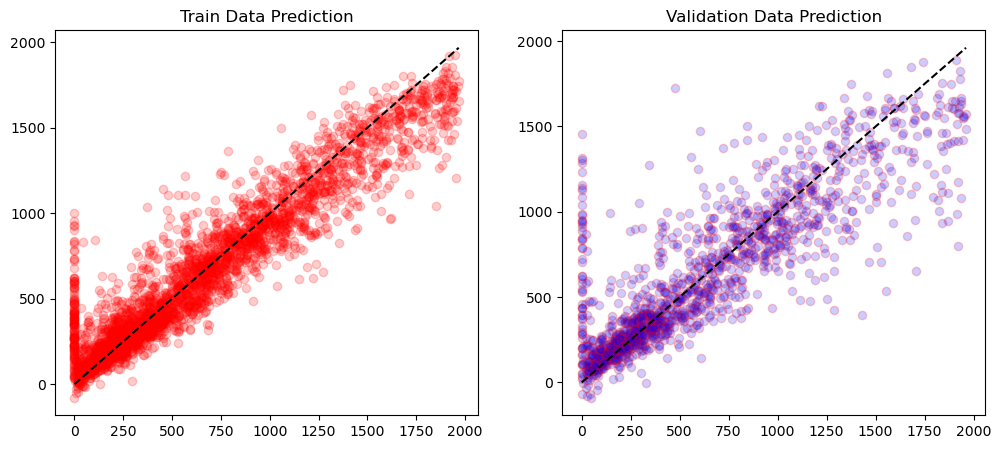

In [41]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

r_X_train, v_X_train, r_y_train, v_y_train = \
train_test_split(X_train, y_train, test_size= 0.3, random_state=321)
# 모델 학습 및 예측
g_lgb_r.fit(r_X_train, r_y_train)
prediction_r_train = g_lgb_r.predict(r_X_train)
prediction_v_train = g_lgb_r.predict(v_X_train)

# 평가
get_evaluation_negative(r_y_train, prediction_r_train)
get_evaluation_negative(v_y_train, prediction_v_train)

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(r_y_train, prediction_r_train, edgecolors='red', c='red', alpha=0.2)
ax[0].plot([r_y_train.min(), r_y_train.max()], [r_y_train.min(), r_y_train.max()], 'k--')
ax[0].set_title('Train Data Prediction')

ax[1].scatter(v_y_train, prediction_v_train, edgecolors='red', c='blue', alpha=0.2)
ax[1].plot([v_y_train.min(), v_y_train.max()], [v_y_train.min(), v_y_train.max()], 'k--')
ax[1].set_title('Validation Data Prediction')
plt.show()

MSE: 76110.9140, RMSE: 275.8821, R2: 0.7125


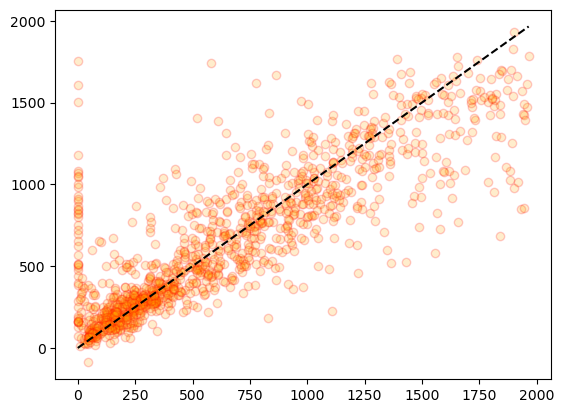

In [42]:
import matplotlib.pyplot as plt

prediction = g_lgb_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

# C04
- 과적합이 판단되어 교차 검증을 했으나 유의미한 수치 변화를 확인하지 못함

# Cycle 05
- 모델의 일반화를 위해 다중공선성과 상관관계 확인 후 불필요 feature 제거

In [43]:
from statsmodels.api import OLS

features, targets = origin_b_df.iloc[:, :-1], origin_b_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     518.7
Date:                Tue, 14 May 2024   Prob (F-statistic):               0.00
Time:                        16:50:35   Log-Likelihood:                -44094.
No. Observations:                6003   AIC:                         8.821e+04
Df Residuals:                    5992   BIC:                         8.828e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Hour                      

In [44]:
origin_b_df.corr()['target'].sort_values(ascending=False)[1:]

Temperature(?C)            0.482985
Hour                       0.409595
Dew point temperature      0.341718
Solar Radiation (MJ/m2)    0.254288
Visibility (10m)           0.153907
Wind speed (m/s)           0.144477
Snowfall (cm)             -0.074792
Humidity(%)               -0.155957
Rainfall(mm)              -0.168834
Seasons                   -0.226783
Holiday                         NaN
Name: target, dtype: float64

In [45]:
origin_b_df = origin_b_df.drop(labels = ['Holiday'], axis = 1)

In [46]:
from statsmodels.api import OLS

features, targets = origin_b_df.iloc[:, :-1], origin_b_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              2189.
Date:                Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                        16:50:35   Log-Likelihood:                         -44115.
No. Observations:                6003   AIC:                                  8.825e+04
Df Residuals:                    5993   BIC:                                  8.832e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [47]:
# 상관관계 확인
origin_b_df.corr()['target'].sort_values(ascending=False)[1:]

Temperature(?C)            0.482985
Hour                       0.409595
Dew point temperature      0.341718
Solar Radiation (MJ/m2)    0.254288
Visibility (10m)           0.153907
Wind speed (m/s)           0.144477
Snowfall (cm)             -0.074792
Humidity(%)               -0.155957
Rainfall(mm)              -0.168834
Seasons                   -0.226783
Name: target, dtype: float64

In [48]:
origin_b_df = origin_b_df.drop(labels = ['Humidity(%)', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)'], axis = 1)

In [49]:
from statsmodels.api import OLS

features, targets = origin_b_df.iloc[:, :-1], origin_b_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              3126.
Date:                Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                        16:50:35   Log-Likelihood:                         -44117.
No. Observations:                6003   AIC:                                  8.825e+04
Df Residuals:                    5996   BIC:                                  8.830e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [50]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline


features, targets = origin_b_df.iloc[:,:-1], origin_b_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, test_size=0.2, random_state=321)

kfold = KFold(n_splits=10, random_state=124, shuffle=True)

lgb_r = LGBMRegressor()

parameters = {
    'random_state': [321],
    # 'reg_lambda': [100],
    'verbose': [-1]
}

g_lgb_r = GridSearchCV(lgb_r, param_grid=parameters, cv=kfold, scoring='neg_mean_squared_error')
g_lgb_r.fit(X_train, y_train)

# 최적의 파라미터와 성능 출력
print("Best parameters:", g_lgb_r.best_params_)
print("Best cross-validation score: {:.3f}".format(-g_lgb_r.best_score_))


Best parameters: {'random_state': 321, 'verbose': -1}
Best cross-validation score: 70361.101


In [51]:
prediction = g_lgb_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 73783.6514, RMSE: 271.6315, R2: 0.7213


MSE: 34129.5792, RMSE: 184.7419, R2: 0.8695
MSE: 72804.4248, RMSE: 269.8230, R2: 0.7209


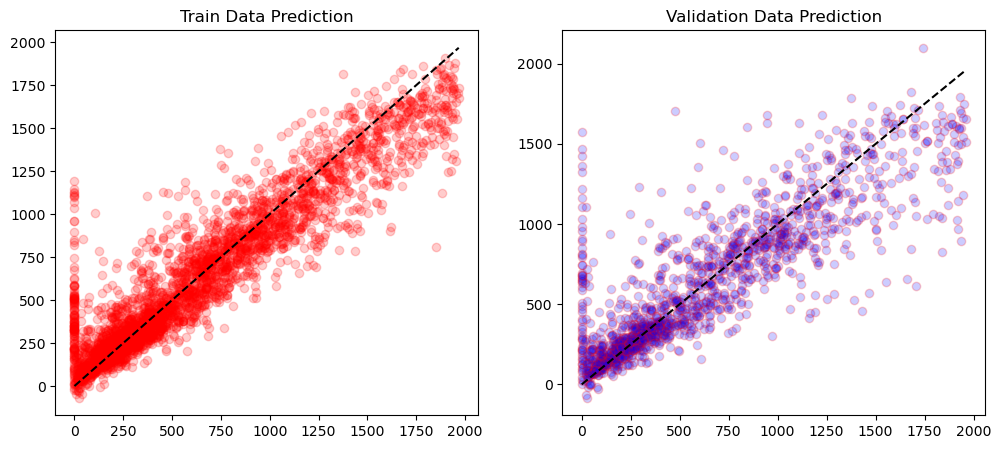

In [52]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

r_X_train, v_X_train, r_y_train, v_y_train = \
train_test_split(X_train, y_train, test_size= 0.3, random_state=321)
# 모델 학습 및 예측
g_lgb_r.fit(r_X_train, r_y_train)
prediction_r_train = g_lgb_r.predict(r_X_train)
prediction_v_train = g_lgb_r.predict(v_X_train)

# 평가
get_evaluation_negative(r_y_train, prediction_r_train)
get_evaluation_negative(v_y_train, prediction_v_train)

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(r_y_train, prediction_r_train, edgecolors='red', c='red', alpha=0.2)
ax[0].plot([r_y_train.min(), r_y_train.max()], [r_y_train.min(), r_y_train.max()], 'k--')
ax[0].set_title('Train Data Prediction')

ax[1].scatter(v_y_train, prediction_v_train, edgecolors='red', c='blue', alpha=0.2)
ax[1].plot([v_y_train.min(), v_y_train.max()], [v_y_train.min(), v_y_train.max()], 'k--')
ax[1].set_title('Validation Data Prediction')
plt.show()

MSE: 77422.8986, RMSE: 278.2497, R2: 0.7076


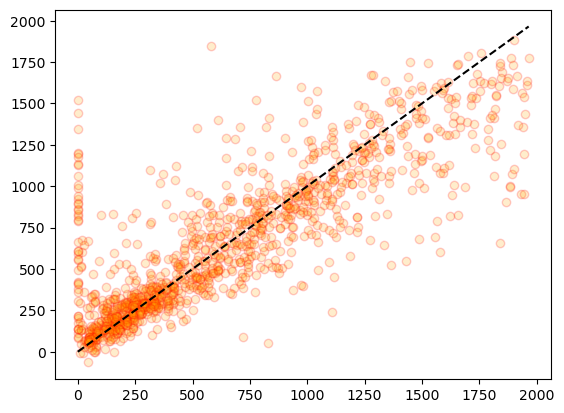

In [53]:
import matplotlib.pyplot as plt

prediction = g_lgb_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

# C05 
- 다중공선성과 상관관계를 확인하여도 차이가 있는 부분을 확인.

# Cycle 06 
- 각 수치형 데이터에 대하여 powertransform 을 사용하여 일반화 강화
- Ridge 규제를 통해 과적함을 추가적으로 방지

In [54]:
from sklearn.preprocessing import PowerTransformer

columns = pre_b_df.iloc[:, :-1].columns
power_b_df = pre_b_df.copy()

for column in columns:
    ptf = PowerTransformer(standardize=False)
    result = ptf.fit_transform(pre_b_df[[column]])
    power_b_df[column] = result 

power_b_df


Hour  Temperature(?C)  Humidity(%)  Wind speed (m/s)  \
0      0.000000        -5.277625    23.459963          1.153031   
1      0.900468        -5.584689    23.997464          0.585195   
2      1.679395        -6.096854    24.532625          0.689545   
3      2.388592        -6.301851    25.065516          0.638764   
4      3.050073        -6.096854    22.920051          1.183262   
...         ...              ...          ...               ...   
8755  10.718738         4.145367    21.832684          1.268668   
8756  11.154203         3.361000    23.459963          1.183262   
8757  11.583995         2.574825    24.532625          0.261847   
8758  12.008441         2.082372    25.596201          0.689545   
8759  12.427836         1.885119    26.651195          0.827711   

      Visibility (10m)  Dew point temperature  Solar Radiation (MJ/m2)  \
0         35578.782659             -15.533241                     -0.0   
1         35578.782659             -15.533241                     -0.0   
2         35578.782659             -15.617087                     -0.0   
3         35578.782659             -15.533241                     -0.0   
4         35578.782659             -16.370502                     -0.0   
...                ...                    ...                      ...   
8755      32923.091246              -9.326430                     -0.0   
8756      35578.782659              -8.980400                     -0.0   
8757      34770.601737              -8.980400                     -0.0   
8758      32059.827342              -8.893775                     -0.0   
8759      33295.149529              -8.459910                     -0.0   

      Rainfall(mm)  Snowfall (cm)  target  
0             -0.0           -0.0     254  
1             -0.0           -0.0     204  
2             -0.0           -0.0     173  
3             -0.0           -0.0     107  
4             -0.0           -0.0      78  
...            ...            ...     ...  
8755          -0.0           -0.0    1003  
8756          -0.0           -0.0     764  
8757          -0.0           -0.0     694  
8758          -0.0           -0.0     712  
8759          -0.0           -0.0     584  

[8760 rows x 10 columns]

In [55]:
from statsmodels.api import OLS

features, targets = power_b_df.iloc[:, :-1], power_b_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                              3147.
Date:                Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                        16:50:38   Log-Likelihood:                         -66217.
No. Observations:                8760   AIC:                                  1.325e+05
Df Residuals:                    8751   BIC:                                  1.325e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [56]:
power_b_df = power_b_df.drop(labels = ['Wind speed (m/s)'], axis = 1)

In [57]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline


features, targets = power_b_df.iloc[:,:-1], power_b_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, test_size=0.2, random_state=321)

kfold = KFold(n_splits=10, random_state=124, shuffle=True)

lgb_r = LGBMRegressor()

parameters = {
    'random_state': [321],
    'reg_lambda': [100],
    'verbose': [-1]
}

g_lgb_r = GridSearchCV(lgb_r, param_grid=parameters, cv=kfold, scoring='neg_mean_squared_error')
g_lgb_r.fit(X_train, y_train)

# 최적의 파라미터와 성능 출력
print("Best parameters:", g_lgb_r.best_params_)
print("Best cross-validation score: {:.3f}".format(-g_lgb_r.best_score_))


Best parameters: {'random_state': 321, 'reg_lambda': 100, 'verbose': -1}
Best cross-validation score: 96302.044


In [58]:
prediction = g_lgb_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 88352.2831, RMSE: 297.2411, R2: 0.7834


MSE: 69019.9169, RMSE: 262.7164, R2: 0.8351
MSE: 99668.6903, RMSE: 315.7035, R2: 0.7608


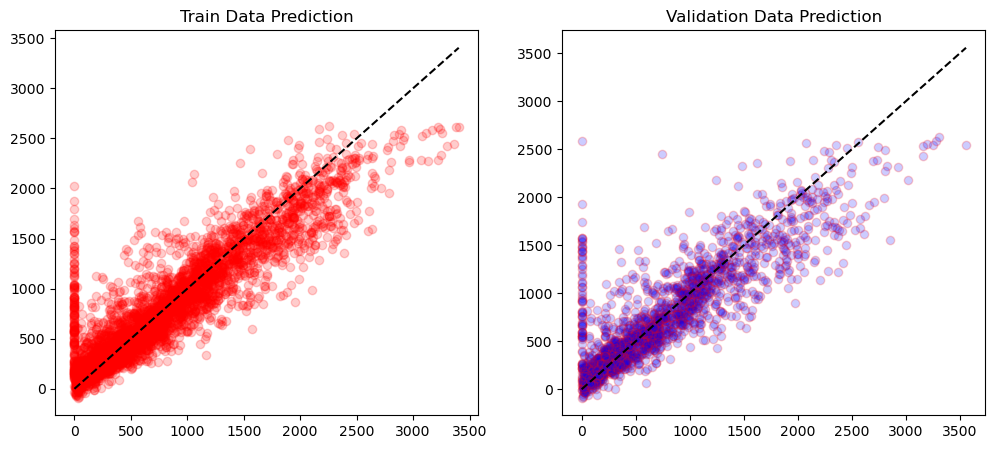

In [59]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

r_X_train, v_X_train, r_y_train, v_y_train = \
train_test_split(X_train, y_train, test_size= 0.3, random_state=321)
# 모델 학습 및 예측
g_lgb_r.fit(r_X_train, r_y_train)
prediction_r_train = g_lgb_r.predict(r_X_train)
prediction_v_train = g_lgb_r.predict(v_X_train)

# 평가
get_evaluation_negative(r_y_train, prediction_r_train)
get_evaluation_negative(v_y_train, prediction_v_train)

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(r_y_train, prediction_r_train, edgecolors='red', c='red', alpha=0.2)
ax[0].plot([r_y_train.min(), r_y_train.max()], [r_y_train.min(), r_y_train.max()], 'k--')
ax[0].set_title('Train Data Prediction')

ax[1].scatter(v_y_train, prediction_v_train, edgecolors='red', c='blue', alpha=0.2)
ax[1].plot([v_y_train.min(), v_y_train.max()], [v_y_train.min(), v_y_train.max()], 'k--')
ax[1].set_title('Validation Data Prediction')
plt.show()

MSE: 93299.6817, RMSE: 305.4500, R2: 0.7713


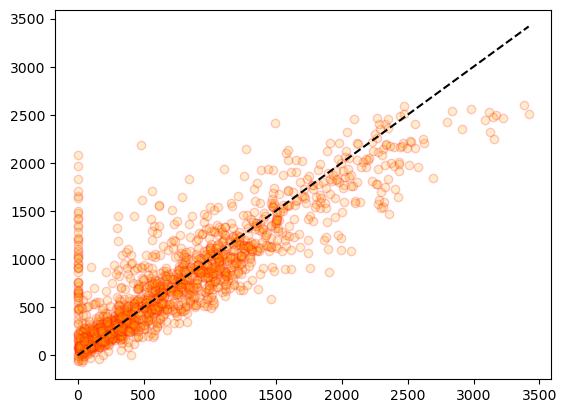

In [60]:
import matplotlib.pyplot as plt

prediction = g_lgb_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

## Cycle06
- 수치폭을 더 좁힐 수 있는지 추가 전처리 진행

# Cycle07
- 불필요 feature삭제

In [61]:
# 상관관계 확인
power_b_df.corr()['target'].sort_values(ascending=False)[1:]

Temperature(?C)            0.538008
Hour                       0.407894
Dew point temperature      0.372139
Solar Radiation (MJ/m2)    0.310649
Visibility (10m)           0.190113
Snowfall (cm)             -0.185888
Humidity(%)               -0.192832
Rainfall(mm)              -0.213277
Name: target, dtype: float64

In [62]:
from statsmodels.api import OLS

features, targets = power_b_df.iloc[:, :-1], power_b_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                              3540.
Date:                Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                        16:50:42   Log-Likelihood:                         -66217.
No. Observations:                8760   AIC:                                  1.325e+05
Df Residuals:                    8752   BIC:                                  1.325e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [63]:
# 상관관계 확인
power_b_df.corr()['target'].sort_values(ascending=False)[1:]

Temperature(?C)            0.538008
Hour                       0.407894
Dew point temperature      0.372139
Solar Radiation (MJ/m2)    0.310649
Visibility (10m)           0.190113
Snowfall (cm)             -0.185888
Humidity(%)               -0.192832
Rainfall(mm)              -0.213277
Name: target, dtype: float64

In [64]:
power_b_df = power_b_df.drop(labels = ['Snowfall (cm)'], axis=1)

In [65]:
from statsmodels.api import OLS

features, targets = power_b_df.iloc[:, :-1], power_b_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                              4044.
Date:                Tue, 14 May 2024   Prob (F-statistic):                        0.00
Time:                        16:50:42   Log-Likelihood:                         -66219.
No. Observations:                8760   AIC:                                  1.325e+05
Df Residuals:                    8753   BIC:                                  1.325e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [66]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline


features, targets = power_b_df.iloc[:,:-1], power_b_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, test_size=0.2, random_state=321)

kfold = KFold(n_splits=10, random_state=124, shuffle=True)

lgb_r = LGBMRegressor()

parameters = {
    'random_state': [321],
    'reg_lambda': [100],
    'verbose': [-1]
}

g_lgb_r = GridSearchCV(lgb_r, param_grid=parameters, cv=kfold, scoring='neg_mean_squared_error')
g_lgb_r.fit(X_train, y_train)

# 최적의 파라미터와 성능 출력
print("Best parameters:", g_lgb_r.best_params_)
print("Best cross-validation score: {:.3f}".format(-g_lgb_r.best_score_))


Best parameters: {'random_state': 321, 'reg_lambda': 100, 'verbose': -1}
Best cross-validation score: 96495.402


In [67]:
prediction = g_lgb_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

MSE: 88007.3417, RMSE: 296.6603, R2: 0.7842


MSE: 69007.0353, RMSE: 262.6919, R2: 0.8351
MSE: 99120.6772, RMSE: 314.8344, R2: 0.7621


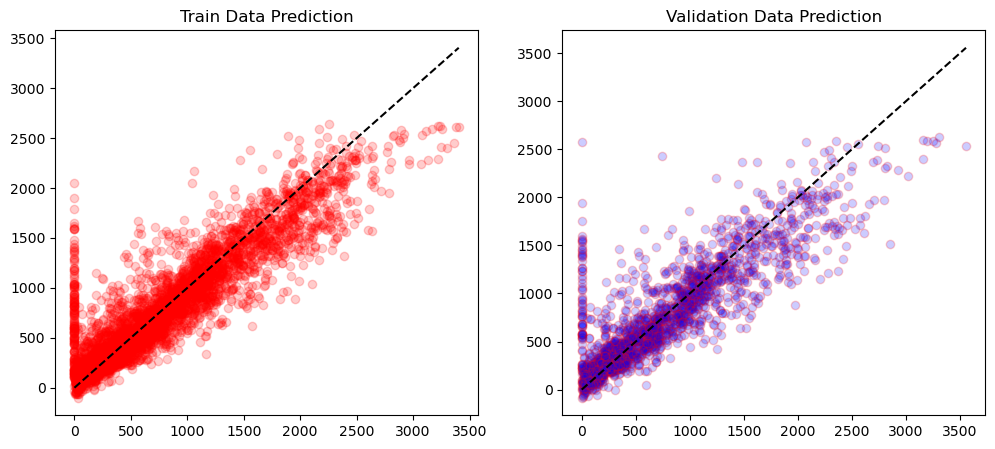

In [68]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=321)

r_X_train, v_X_train, r_y_train, v_y_train = \
train_test_split(X_train, y_train, test_size= 0.3, random_state=321)
# 모델 학습 및 예측
g_lgb_r.fit(r_X_train, r_y_train)
prediction_r_train = g_lgb_r.predict(r_X_train)
prediction_v_train = g_lgb_r.predict(v_X_train)

# 평가
get_evaluation_negative(r_y_train, prediction_r_train)
get_evaluation_negative(v_y_train, prediction_v_train)

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(r_y_train, prediction_r_train, edgecolors='red', c='red', alpha=0.2)
ax[0].plot([r_y_train.min(), r_y_train.max()], [r_y_train.min(), r_y_train.max()], 'k--')
ax[0].set_title('Train Data Prediction')

ax[1].scatter(v_y_train, prediction_v_train, edgecolors='red', c='blue', alpha=0.2)
ax[1].plot([v_y_train.min(), v_y_train.max()], [v_y_train.min(), v_y_train.max()], 'k--')
ax[1].set_title('Validation Data Prediction')
plt.show()

MSE: 93001.6005, RMSE: 304.9616, R2: 0.7720


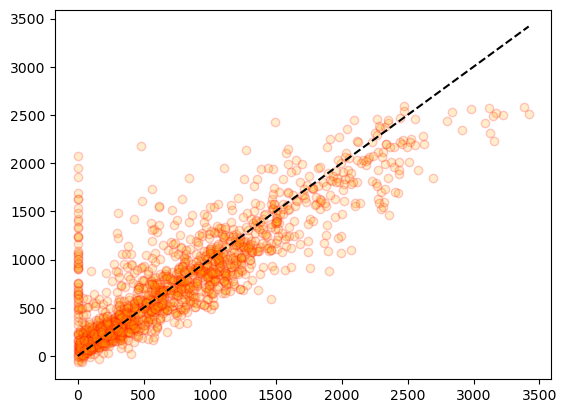

In [69]:
import matplotlib.pyplot as plt

prediction = g_lgb_r.predict(X_test)
get_evaluation_negative(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

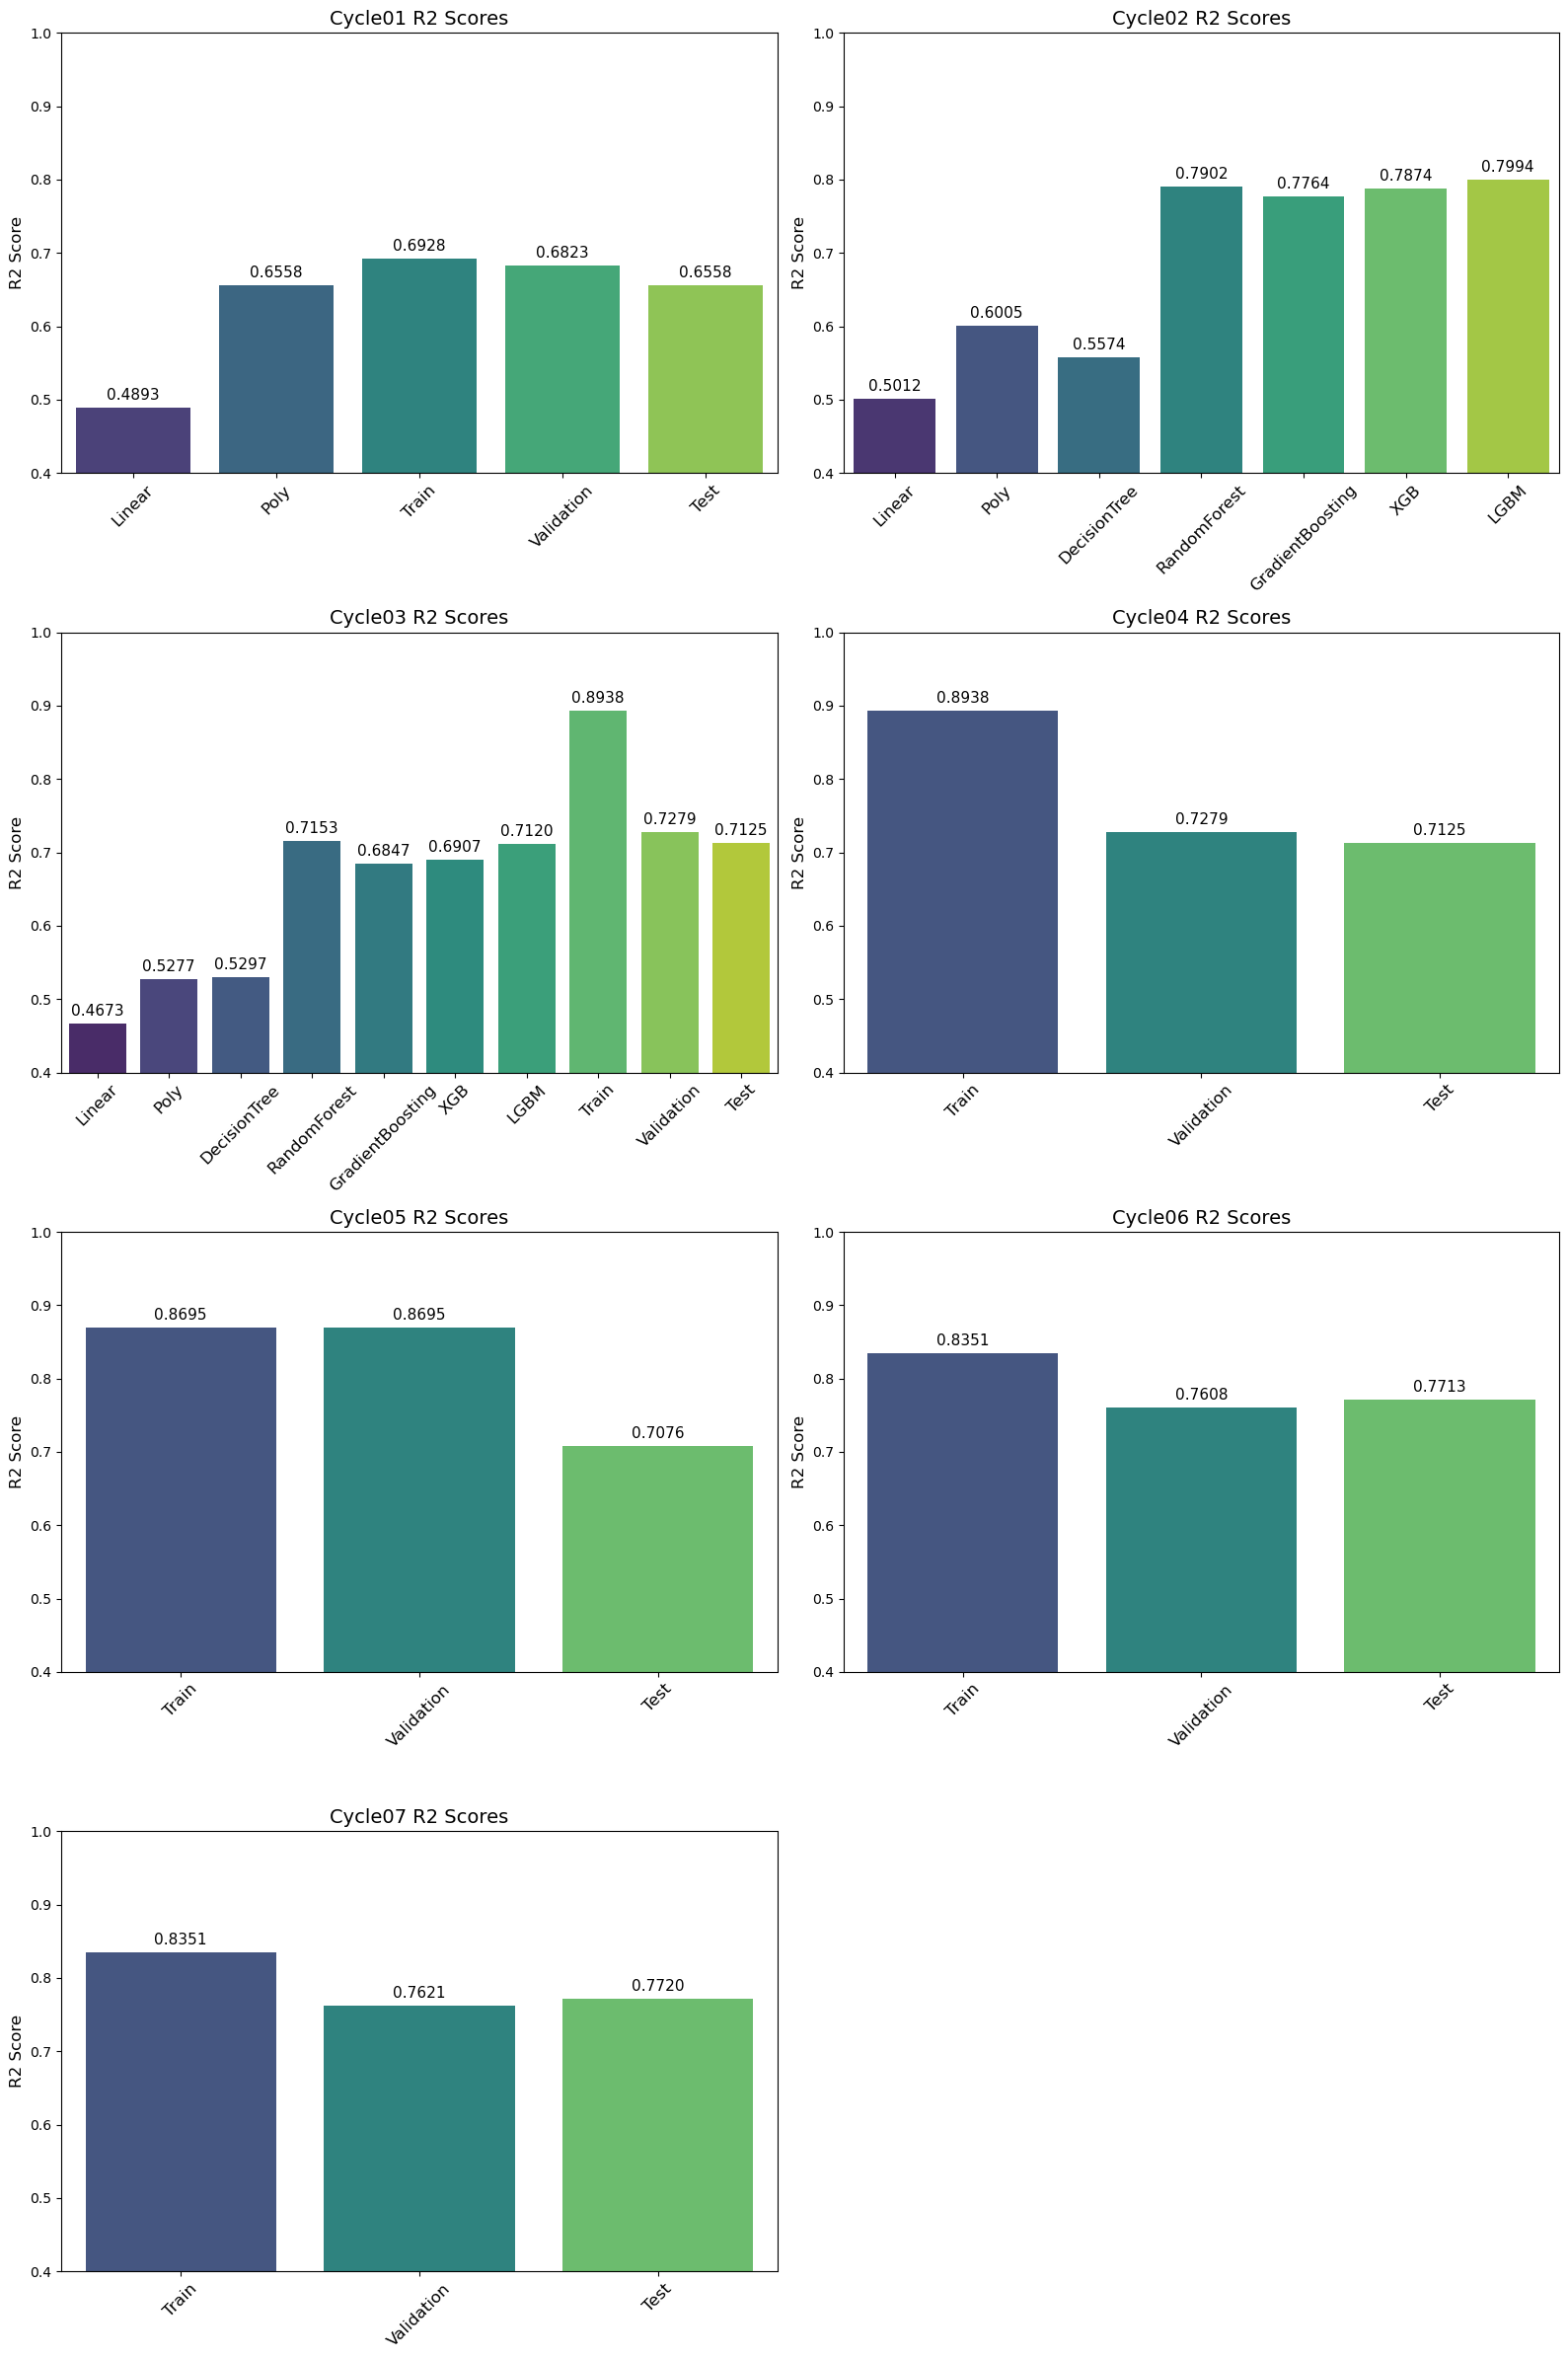

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터 준비
data = {
    "Cycle": [
        "Cycle01", "Cycle01", "Cycle01", "Cycle01", "Cycle01",
        "Cycle02", "Cycle02", "Cycle02", "Cycle02", "Cycle02", "Cycle02", "Cycle02",
        "Cycle03", "Cycle03", "Cycle03", "Cycle03", "Cycle03", "Cycle03", "Cycle03", "Cycle03", "Cycle03", "Cycle03",
        "Cycle04", "Cycle04", "Cycle04",
        "Cycle05", "Cycle05", "Cycle05",
        "Cycle06", "Cycle06", "Cycle06",
        "Cycle07", "Cycle07", "Cycle07"
    ],
    "Model": [
        "Linear", "Poly", "Train", "Validation", "Test",
        "Linear", "Poly", "DecisionTree", "RandomForest", "GradientBoosting", "XGB", "LGBM",
        "Linear", "Poly", "DecisionTree", "RandomForest", "GradientBoosting", "XGB", "LGBM", "Train", "Validation", "Test",
        "Train", "Validation", "Test",
        "Train", "Validation", "Test",
        "Train", "Validation", "Test",
        "Train", "Validation", "Test"
    ],
    "R2": [
        0.4893, 0.6558, 0.6928, 0.6823, 0.6558,
        0.5012, 0.6005, 0.5574, 0.7902, 0.7764, 0.7874, 0.7994,
        0.4673, 0.5277, 0.5297, 0.7153, 0.6847, 0.6907, 0.7120, 0.8938, 0.7279, 0.7125,
        0.8938, 0.7279, 0.7125,
        0.8695, 0.8695, 0.7076,
        0.8351, 0.7608, 0.7713,
        0.8351, 0.7621, 0.7720
    ]
}

# DataFrame 생성
df = pd.DataFrame(data)

# 사이클 별로 데이터 분류
cycles = df['Cycle'].unique()

# 그래프 준비
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 24))  # 4행 2열로 조정
axes = axes.flatten()  # 다차원 배열을 1차원 배열로 변환

# 각 사이클별로 서브플롯 생성
for i, cycle in enumerate(cycles):
    subset = df[df['Cycle'] == cycle]
    bar_plot = sns.barplot(data=subset, x='Model', y='R2', ax=axes[i], palette='viridis')
    axes[i].set_title(f'{cycle} R2 Scores', fontsize=14)
    axes[i].set_ylim(0.4, 1.0)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('R2 Score', fontsize=12)
    # 수치 표기 추가
    for p in bar_plot.patches:
        bar_plot.annotate(format(p.get_height(), '.4f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 9), 
                          textcoords = 'offset points', fontsize=11)

# 빈 서브플롯 숨기기
for j in range(i + 1, 8):
    axes[j].set_visible(False)  # 남은 서브플롯을 숨깁니다.

# 레이아웃 조정
plt.tight_layout()
plt.show()


# 가설?
- 자전거 대여에 대하여 배치를 하는 개수에 대하여 여러 요소가 적용될 수 있습니다.
- 어떤 요소에 의해 자전거 배치 개수의 요소를조절하는지 상관관계를 파악하기 위해 분석을 진행하였습니다.
- 공유할 수 있는 자전거 수를 예측하면 공유회사가 자전거 개수를 더 잘 계획하고 판단이 가능할 것으로 예상합니다.


여기서 제시된 내용은 자전거 대여 서비스에 대한 데이터 분석 프로젝트의 가설 설정과 최종 결론을 요약하고 있습니다. 추가로 모델의 일반화 및 과적합 방지에 대한 접근 방법도 설명되어 있습니다. 이를 명확하고 조직적으로 정리하겠습니다.

가설
목적: 자전거 대여 서비스에서 자전거 배치 개수에 영향을 미치는 주요 요소들을 식별하고 이해하기 위해 데이터를 분석합니다.

주요 내용:
여러 요소들이 자전거 대여 수량에 영향을 미칠 수 있다고 가정합니다.
이 요소들과 자전거 배치 개수 간의 상관관계를 분석하여 어떤 요소들이 가장 큰 영향을 미치는지 파악합니다.
예측 모델을 통해 공유할 수 있는 자전거의 수를 예측함으로써, 자전거 공유 회사가 자전거 수를 보다 효과적으로 계획하고 관리할 수 있을 것으로 기대합니다.

# 최종 결론
- validation 그래프를 확인했을 때 train 데이터와 비교하였을 때 차이가 있는 것으로 확인하여 과적합이 있을 수 있음을 판단.
- 다중공선성, PowerTransform , 상관관계를 확인하여 모델의 일반회를 진행하였습니다.
- 해당 부분에서도 score의 차이가 조금 더 있는 부분을 확인하여 교차검증의 l2 규제를 사용하여 과적합을 방지하였습니다.

결론
분석 결과 및 조치:

과적합 문제 식별: Validation 그래프를 통해 Train 데이터와의 성능 차이를 확인했습니다. 이를 통해 모델에 과적합이 있음을 판단했습니다.
모델 일반화 개선: 다중공선성 검사, Power Transform 적용, 상관관계 분석을 통해 모델의 일반화를 도모했습니다. 이러한 분석을 통해 모델이 더욱 강건해질 수 있도록 조치를 취했습니다.
L2 규제 적용: 교차 검증을 통해 L2 규제를 적용함으로써 과적합을 방지하였습니다. 이를 통해 검증 데이터에서의 모델 성능을 개선했습니다.
종합적인 관점
이 프로젝트를 통해 자전거 대여 수량에 영향을 미치는 주요 요소들을 파악하고, 이를 기반으로 효과적인 자전거 배치 전략을 수립할 수 있게 되었습니다. 모델의 과적합 문제를 식별하고 이를 개선하는 방법을 적용함으로써, 모델의 신뢰성과 일반화 능력을 높였습니다. 이 결과는 자전거 공유 회사에게 자전거 배치 계획을 더 잘 수립하고, 고객 수요를 보다 효과적으로 충족시킬 수 있는 방안을 제공합니다.




